In [3]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [6]:
# 1.2 Load the Dataset

# Load full dataset (slow but necessary for full analysis)
data = pd.read_csv(r'D:\Sparkathon\Data\raw data(2019-Nov).csv', low_memory=False, parse_dates=['event_time'])

# Preview data
print("Shape:", data.shape)
data.head()


Shape: (67501979, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [16]:
# 1.3 Basic Inspection
# Column names
print("Columns:", data.columns)

# Check nulls
print("\nMissing values:\n", data.isnull().sum())

# Check data types
data.dtypes

Columns: Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

Missing values:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64


event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [18]:
# 1.4 Drop Unnecessary Null Rows

# Drop rows with no product_id, user_id, or event_type (essential fields)
data.dropna(subset=['product_id', 'user_id', 'event_type', 'user_session'], inplace=True)

# Fill missing brand and category_code with "Unknown"
data['brand'].fillna('Unknown', inplace=True)
data['category_code'].fillna('Unknown', inplace=True)

print("After cleaning, shape:", data.shape)


After cleaning, shape: (67501969, 9)


In [20]:
# 1.5 Feature Engineering: Time-Based

# Make sure event_time is datetime
data['event_time'] = pd.to_datetime(data['event_time'])

# Extract features
data['event_hour'] = data['event_time'].dt.hour
data['event_day'] = data['event_time'].dt.day
data['event_weekday'] = data['event_time'].dt.weekday
data['event_month'] = data['event_time'].dt.month
data['event_date'] = data['event_time'].dt.date

In [22]:
# 1.6 Category-Level Breakdown

# Check top category codes
print("\nTop category codes:")
print(data['category_code'].value_counts().head(10))

# Extract top-level category (e.g., "electronics" from "electronics.smartphone")
data['main_category'] = data['category_code'].apply(lambda x: x.split('.')[0] if '.' in x else x)

print("\nTop main categories:")
print(data['main_category'].value_counts())


Top category codes:
category_code
Unknown                             21898168
electronics.smartphone              16374997
electronics.video.tv                 2208045
computers.notebook                   2180554
electronics.clocks                   2086965
apparel.shoes                        1886890
electronics.audio.headphone          1816875
appliances.environment.vacuum        1528058
appliances.kitchen.refrigerators     1427162
appliances.kitchen.washer            1403866
Name: count, dtype: int64

Top main categories:
main_category
electronics     24006079
Unknown         21898168
appliances       8489825
computers        4181358
apparel          3011101
furniture        2111829
auto             1214159
construction     1092155
kids              806384
accessories       390038
sport             247994
medicine           22382
country_yard       17719
stationery         12778
Name: count, dtype: int64


In [24]:
# 1.7 Price Statistics

# Check price distribution
print("Price summary:\n", data['price'].describe())

Price summary:
 count    6.750197e+07
mean     2.924593e+02
std      3.556745e+02
min      0.000000e+00
25%      6.924000e+01
50%      1.657700e+02
75%      3.603400e+02
max      2.574070e+03
Name: price, dtype: float64


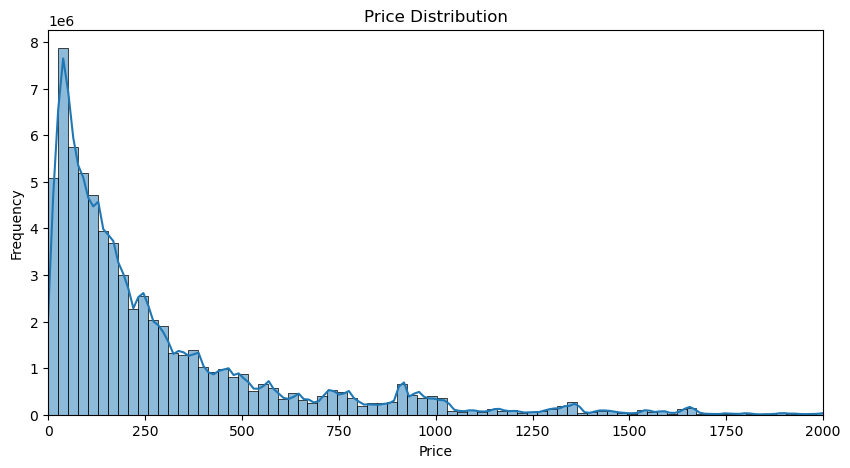

In [26]:
 # Visualize price distribution
plt.figure(figsize=(10,5))
sns.histplot(data['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2000)  # Optional zoom
plt.show()


Event types:
 event_type
view        63556110
cart         3028920
purchase      916939
Name: count, dtype: int64


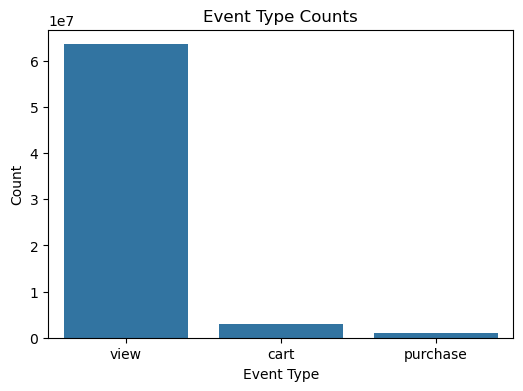

In [28]:
# 1.8 Event Type Counts

event_counts = data['event_type'].value_counts()
print("\nEvent types:\n", event_counts)

# Optional: Plot
plt.figure(figsize=(6,4))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title("Event Type Counts")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

In [35]:
# 1.9 Save Cleaned Dataset

# Save to new CSV
data.to_csv("phase1_Nov_cleaned_ecommerce_data.csv", index=False)
print("Cleaned data saved!")

Cleaned data saved!
